In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [2]:
# load data
# set-up paths
home_dir = '/Volumes/Data/'
in_path = home_dir+'Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = home_dir+'Emily/figures/fig_2_mapseq/python_out/'


# Load normalized count data - minimum intervention
with open(in_path + 'M194_M220_OMC_separate_all_count.pkl', 'rb') as f:
    omc_count = pickle.load(f)
    
with open(in_path + 'M194_M220_ACA_separate_all_count.pkl', 'rb') as f:
    aca_count = pickle.load(f)

with open(in_path + 'M194_M220_OMC_separate_all_countN.pkl', 'rb') as f:
    omc_countN = pickle.load(f)
    
with open(in_path + 'M194_M220_ACA_separate_all_countN.pkl', 'rb') as f:
    aca_countN = pickle.load(f)

# histograms of bc counts

## animal replicates

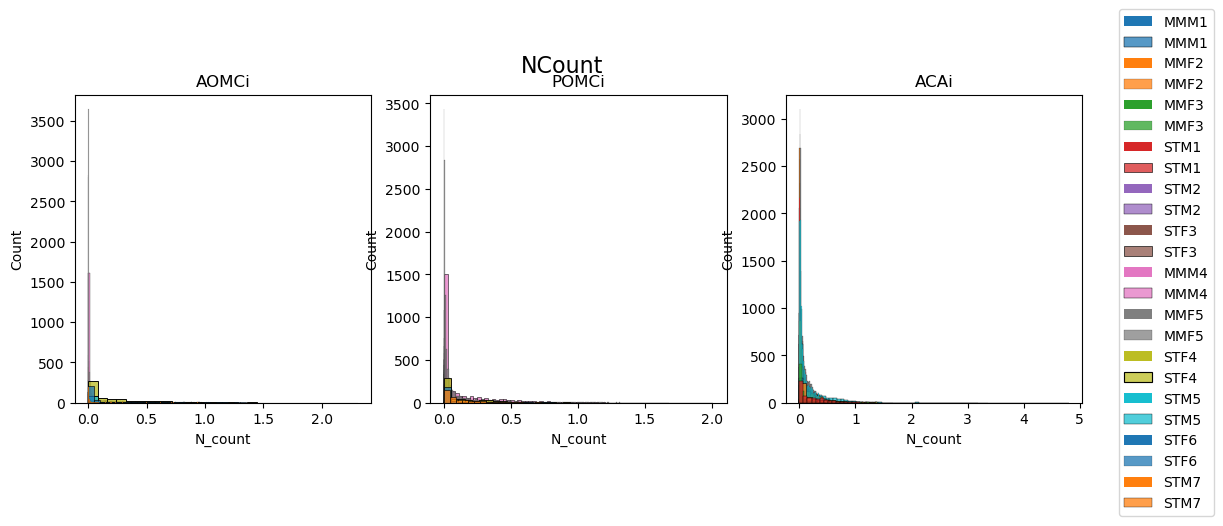

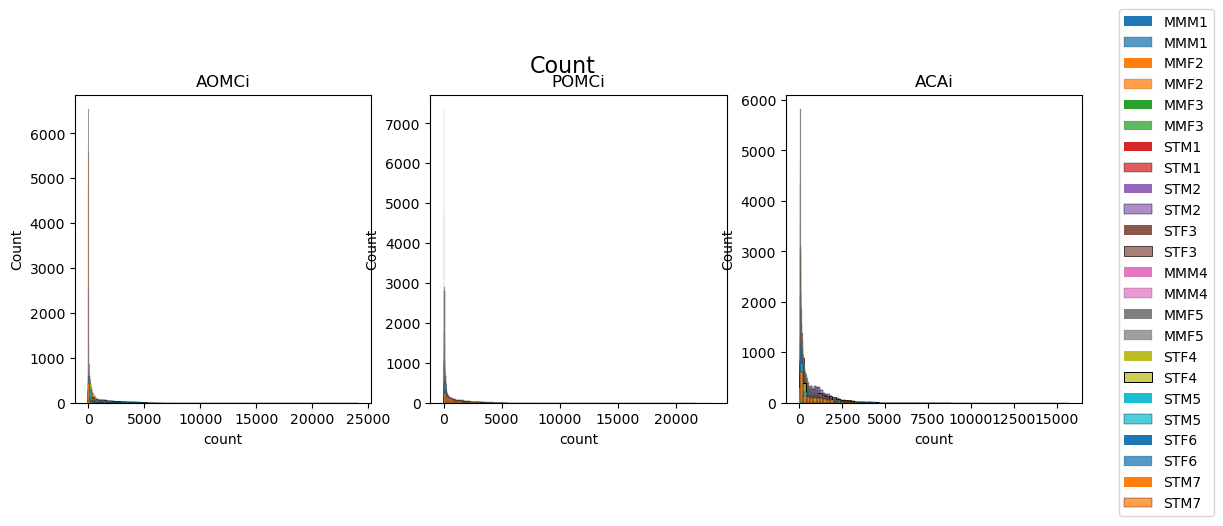

In [38]:
to_plot = ['AOMCi', "POMCi", "ACAi"]

fig, axs = plt.subplots(1,3, figsize=(13,4))

i = 0
for ax in axs:
    area = to_plot[i]
    # seperate for ACAi
    if area=="ACAi":
        for j in range(metadata.shape[0]):
            bi = aca_countN[j]
            idx = bi[area] > 0
            plot = bi[idx][area]
            sns.histplot(plot, label=metadata.loc[j,'mice'], log_scale=False, ax=ax)
            ax.set_title(area)
            ax.set_xlabel("N_count")
            ax.legend(bbox_to_anchor=(1.1, 1.3))
    for j in range(metadata.shape[0]):
        bi = omc_countN[j]
        idx = bi[area] > 0
        plot = bi[idx][area]
        sns.histplot(plot, label=metadata.loc[j,'mice'], log_scale=False, ax=ax)
        ax.set_title(area)
        ax.set_xlabel("N_count")
    
    
    i+=1

plt.suptitle("NCount", size=16)
plt.show()


#################
fig, axs = plt.subplots(1,3, figsize=(13,4))

i = 0
for ax in axs:
    area = to_plot[i]
    if area=="ACAi":
        for j in range(metadata.shape[0]):
            bi = aca_count[j]
            idx = bi[area] > 0
            plot = bi[idx][area]
            sns.histplot(plot, label=metadata.loc[j,'mice'], log_scale=False, ax=ax)
            ax.set_title(area)
            ax.set_xlabel("count")
            ax.legend(bbox_to_anchor=(1.1, 1.3))
    for j in range(metadata.shape[0]):
        bi = omc_count[j]
        idx = bi[area] > 0
        plot = bi[idx][area]
        sns.histplot(plot, label=metadata.loc[j,'mice'], log_scale=False, ax=ax)
        ax.set_title(area)
        ax.set_xlabel("count")

    
    i+=1

plt.suptitle("Count", size=16)
plt.show()

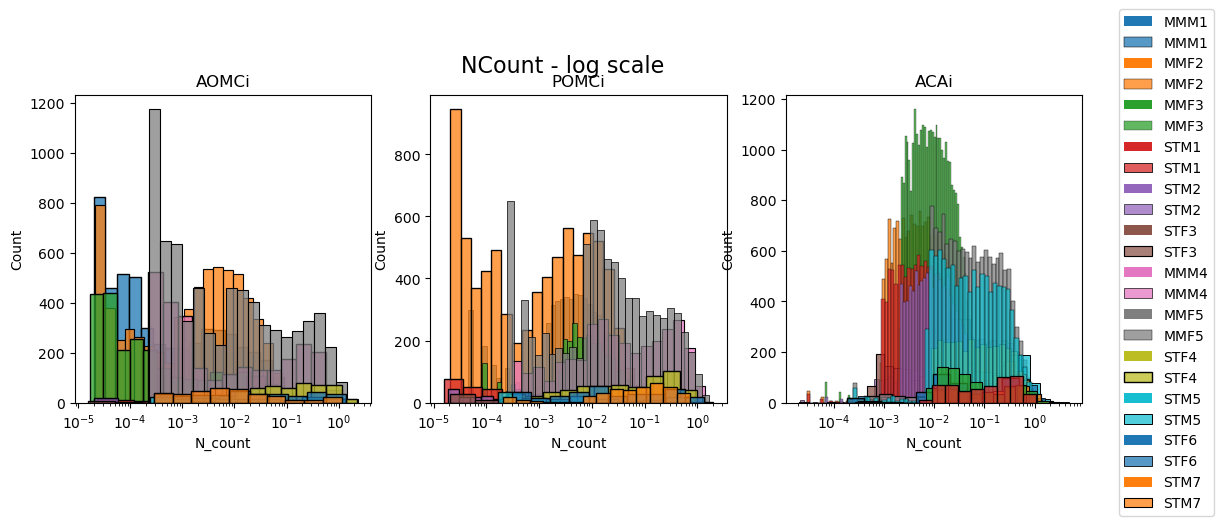

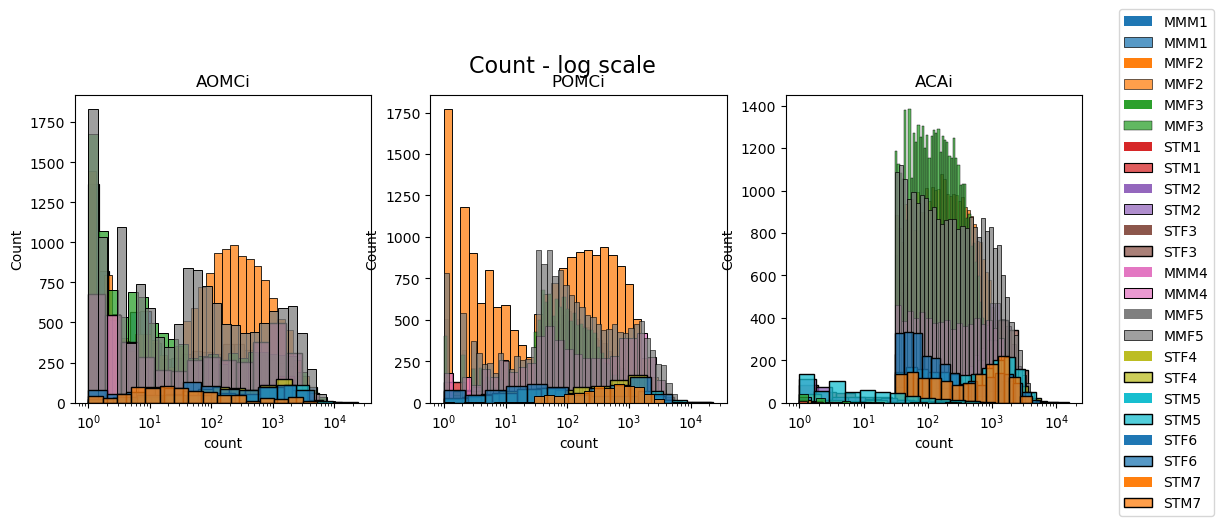

In [39]:
to_plot = ['AOMCi', "POMCi", "ACAi"]

fig, axs = plt.subplots(1,3, figsize=(13,4))

i = 0
for ax in axs:
    area = to_plot[i]
    # seperate for ACAi
    if area=="ACAi":
        for j in range(metadata.shape[0]):
            bi = aca_countN[j]
            idx = bi[area] > 0
            plot = bi[idx][area]
            sns.histplot(plot, label=metadata.loc[j,'mice'], log_scale=True, ax=ax)
            ax.set_title(area)
            ax.set_xlabel("N_count")
            ax.legend(bbox_to_anchor=(1.1, 1.3))
    for j in range(metadata.shape[0]):
        bi = omc_countN[j]
        idx = bi[area] > 0
        plot = bi[idx][area]
        sns.histplot(plot, label=metadata.loc[j,'mice'], log_scale=True, ax=ax)
        ax.set_title(area)
        ax.set_xlabel("N_count")
    
    
    i+=1

plt.suptitle("NCount - log scale", size=16)
plt.show()


#################
fig, axs = plt.subplots(1,3, figsize=(13,4))

i = 0
for ax in axs:
    area = to_plot[i]
    if area=="ACAi":
        for j in range(metadata.shape[0]):
            bi = aca_count[j]
            idx = bi[area] > 0
            plot = bi[idx][area]
            sns.histplot(plot, label=metadata.loc[j,'mice'], log_scale=True, ax=ax)
            ax.set_title(area)
            ax.set_xlabel("count")
            ax.legend(bbox_to_anchor=(1.1, 1.3))
    for j in range(metadata.shape[0]):
        bi = omc_count[j]
        idx = bi[area] > 0
        plot = bi[idx][area]
        sns.histplot(plot, label=metadata.loc[j,'mice'], log_scale=True, ax=ax)
        ax.set_title(area)
        ax.set_xlabel("count")

    
    i+=1

plt.suptitle("Count - log scale", size=16)
plt.show()

## by species

In [66]:
# sort by species

# create added df with all cells from each species
mm_omc_count = pd.DataFrame(columns=omc_count[0].columns)
st_omc_count = pd.DataFrame(columns=omc_count[0].columns)
mm_omc_countN = pd.DataFrame(columns=omc_count[0].columns)
st_omc_countN = pd.DataFrame(columns=omc_count[0].columns)

for i in range(metadata.shape[0]):
    df = omc_count[i]
    dfN = omc_countN[i]
    if metadata.loc[i, 'species']=="MMus":
        mm_omc_count = pd.concat([mm_omc_count, df])
        mm_omc_countN = pd.concat([mm_omc_countN, dfN])
    elif metadata.loc[i, 'species']=="STeg":
        st_omc_count = pd.concat([st_omc_count, df])
        st_omc_countN = pd.concat([st_omc_countN, dfN])



mm_omc_count = mm_omc_count.reset_index(drop=True)
st_omc_count = st_omc_count.reset_index(drop=True)
mm_omc_countN = mm_omc_countN.reset_index(drop=True)
st_omc_countN = st_omc_countN.reset_index(drop=True)



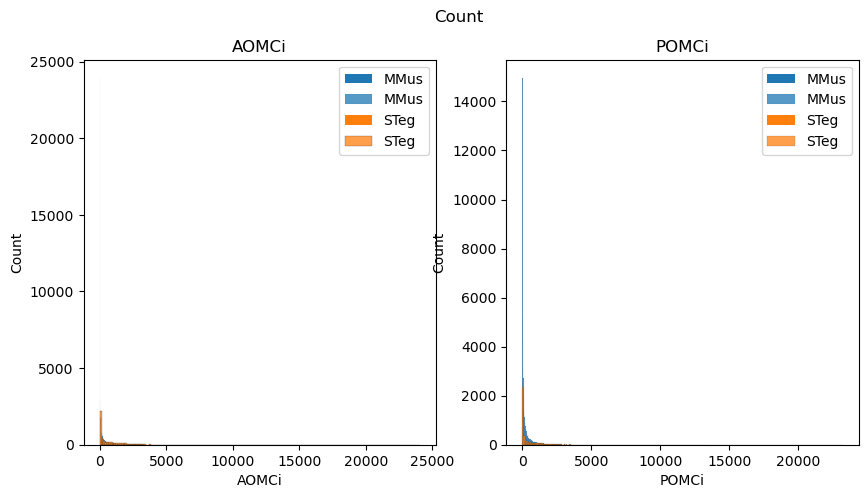

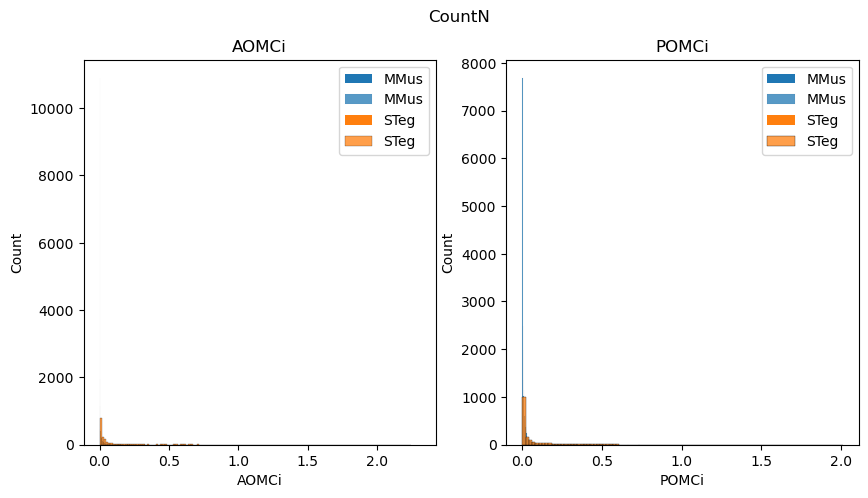

In [67]:
to_plot = ["AOMCi", "POMCi"]

fig, axs = plt.subplots(1,2, figsize=(10,5))

i = 0
for ax in axs.flat:
    area = to_plot[i]

    # get all nonzero values
    idx_mm = mm_omc_count[area] > 0
    idx_st = st_omc_count[area] > 0

    plot_mm = mm_omc_count[idx_mm][area]
    plot_st = st_omc_count[idx_st][area]

    sns.histplot(plot_mm, ax=ax, label="MMus")
    sns.histplot(plot_st, ax=ax, label="STeg")
    ax.legend()
    ax.set_title(area)
    i+=1

plt.suptitle("Count")
plt.show()

#####
to_plot = ["AOMCi", "POMCi"]

fig, axs = plt.subplots(1,2, figsize=(10,5))

i = 0
for ax in axs.flat:
    area = to_plot[i]

    # get all nonzero values
    idx_mm = mm_omc_countN[area] > 0
    idx_st = st_omc_countN[area] > 0

    plot_mm = mm_omc_countN[idx_mm][area]
    plot_st = st_omc_countN[idx_st][area]

    sns.histplot(plot_mm, ax=ax, label="MMus")
    sns.histplot(plot_st, ax=ax, label="STeg")
    ax.legend()
    ax.set_title(area)
    i+=1

plt.suptitle("CountN")
plt.show()

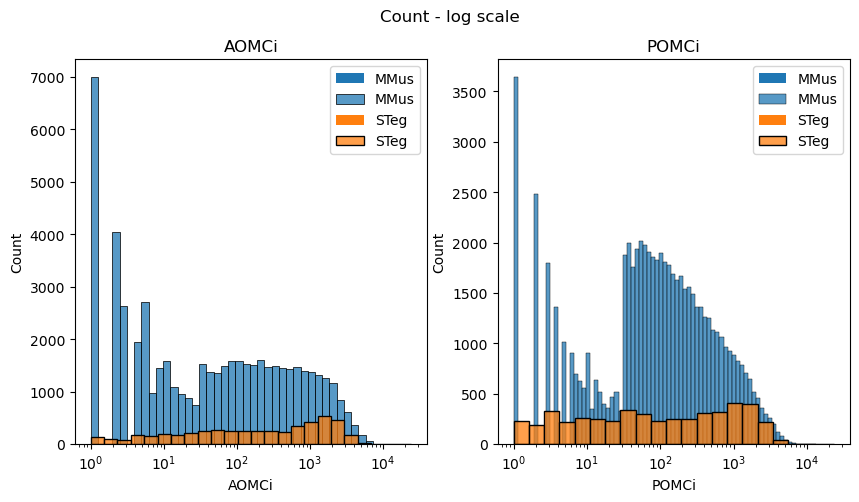

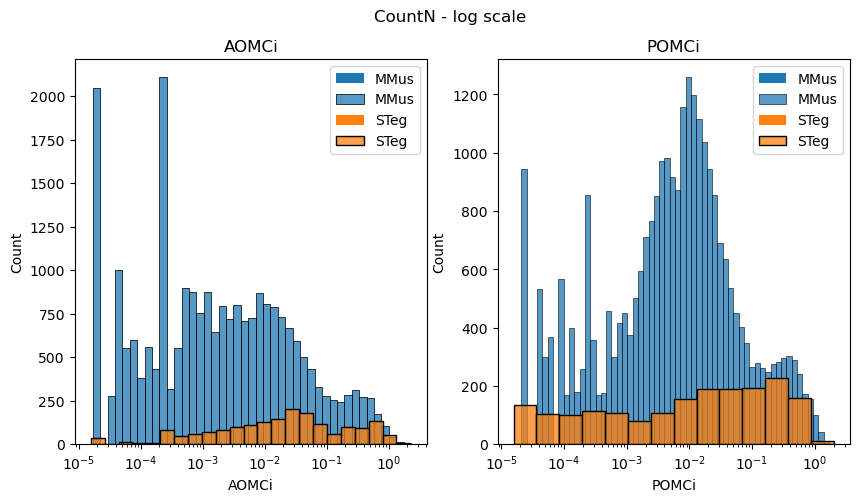

In [68]:
to_plot = ["AOMCi", "POMCi"]

fig, axs = plt.subplots(1,2, figsize=(10,5))

i = 0
for ax in axs.flat:
    area = to_plot[i]

    # get all nonzero values
    idx_mm = mm_omc_count[area] > 0
    idx_st = st_omc_count[area] > 0

    plot_mm = mm_omc_count[idx_mm][area]
    plot_st = st_omc_count[idx_st][area]

    sns.histplot(plot_mm, ax=ax, label="MMus", log_scale=True)
    sns.histplot(plot_st, ax=ax, label="STeg", log_scale=True)
    ax.legend()
    ax.set_title(area)
    i+=1

plt.suptitle("Count - log scale")
plt.show()

#####
to_plot = ["AOMCi", "POMCi"]

fig, axs = plt.subplots(1,2, figsize=(10,5))

i = 0
for ax in axs.flat:
    area = to_plot[i]

    # get all nonzero values
    idx_mm = mm_omc_countN[area] > 0
    idx_st = st_omc_countN[area] > 0

    plot_mm = mm_omc_countN[idx_mm][area]
    plot_st = st_omc_countN[idx_st][area]

    sns.histplot(plot_mm, ax=ax, label="MMus", log_scale=True)
    sns.histplot(plot_st, ax=ax, label="STeg", log_scale=True)
    ax.legend()
    ax.set_title(area)
    i+=1

plt.suptitle("CountN - log scale")
plt.show()

In [69]:
# sort by species

# create added df with all cells from each species
mm_aca_count = pd.DataFrame(columns=aca_count[0].columns)
st_aca_count = pd.DataFrame(columns=aca_count[0].columns)
mm_aca_countN = pd.DataFrame(columns=aca_count[0].columns)
st_aca_countN = pd.DataFrame(columns=aca_count[0].columns)

for i in range(metadata.shape[0]):
    df = aca_count[i]
    dfN = aca_countN[i]
    if metadata.loc[i, 'species']=="MMus":
        mm_aca_count = pd.concat([mm_aca_count, df])
        mm_aca_countN = pd.concat([mm_aca_countN, dfN])
    elif metadata.loc[i, 'species']=="STeg":
        st_aca_count = pd.concat([st_aca_count, df])
        st_aca_countN = pd.concat([st_aca_countN, dfN])



mm_aca_count = mm_aca_count.reset_index(drop=True)
st_aca_count = st_aca_count.reset_index(drop=True)
mm_aca_countN = mm_aca_countN.reset_index(drop=True)
st_aca_countN = st_aca_countN.reset_index(drop=True)



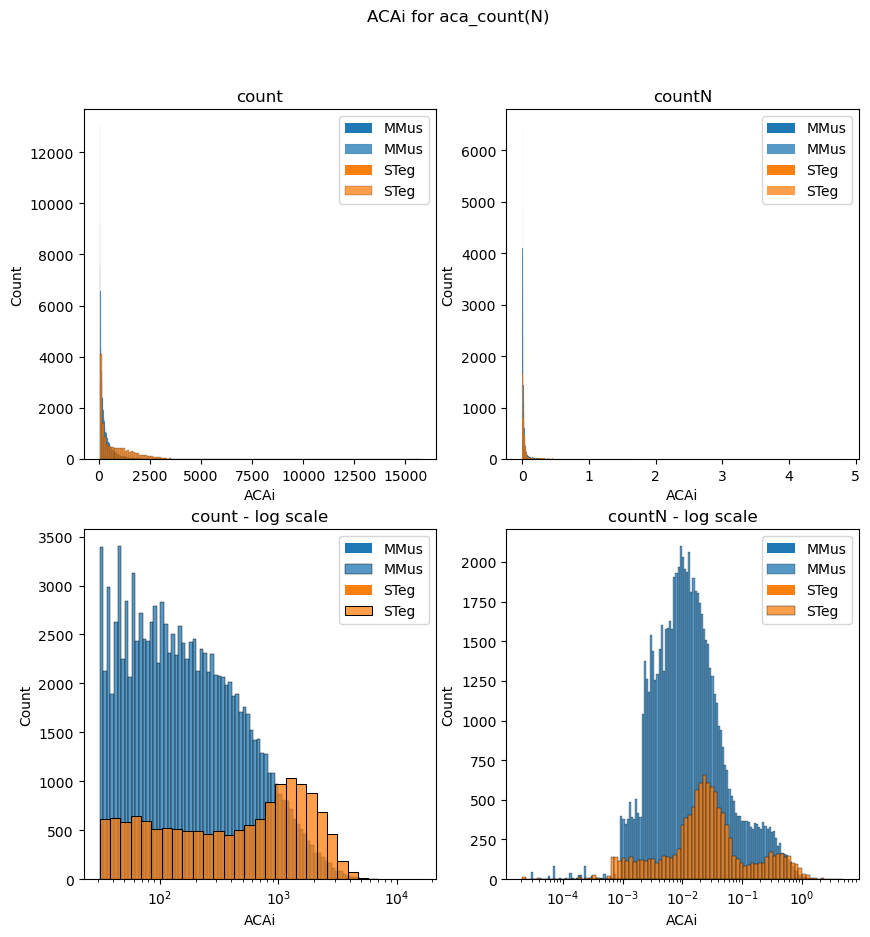

In [70]:

fig, axs = plt.subplots(2,2, figsize=(10,10))

area = "ACAi"

ax = axs[0,0]
# get all nonzero values
idx_mm = mm_aca_count[area] > 0
idx_st = st_aca_count[area] > 0

plot_mm = mm_aca_count[idx_mm][area]
plot_st = st_aca_count[idx_st][area]

sns.histplot(plot_mm, ax=ax, label="MMus")
sns.histplot(plot_st, ax=ax, label="STeg")
ax.legend()
ax.set_title("count")

ax=axs[1,0]
sns.histplot(plot_mm, ax=ax, label="MMus", log_scale=True)
sns.histplot(plot_st, ax=ax, label="STeg", log_scale=True)
ax.legend()
ax.set_title("count - log scale")

#####
ax = axs[0,1]
# get all nonzero values
idx_mm = mm_aca_countN[area] > 0
idx_st = st_aca_countN[area] > 0

plot_mm = mm_aca_countN[idx_mm][area]
plot_st = st_aca_countN[idx_st][area]

sns.histplot(plot_mm, ax=ax, label="MMus")
sns.histplot(plot_st, ax=ax, label="STeg")
ax.legend()
ax.set_title("countN")

ax=axs[1,1]
sns.histplot(plot_mm, ax=ax, label="MMus", log_scale=True)
sns.histplot(plot_st, ax=ax, label="STeg", log_scale=True)
ax.legend()
ax.set_title("countN - log scale")


plt.suptitle("ACAi for aca_count(N)")
plt.show()

In [72]:
mm_aca_count.columns

Index(['OB', 'AOMCi', 'POMCi', 'ACAi', 'AOMCc', 'POMCc', 'ACAc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'AMY', 'HIP', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN'],
      dtype='object')

In [78]:
# look at projection areas
to_plot = ["AOMCc", "POMCc", "AUD", "STRd", "STRv", "TH", 'HY', 'AMY', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']

fig, axs = plt.subplots(3,5, figsize=(15,15))

i = 0
for ax in axs.flat:
       area = to_plot[i]

    # get all nonzero values
       idx_mm = mm_omc_count[area] > 0
       idx_st = st_omc_count[area] > 0

       plot_mm = mm_omc_count[idx_mm][area]
       plot_st = st_omc_count[idx_st][area]

       sns.histplot(plot_mm, ax=ax, label="MMus")
       sns.histplot(plot_st, ax=ax, label="STeg")
       ax.legend()
       ax.set_title(area)

       i+=1

plt.suptitle("OMC Targets - Counts")
plt.show()


KeyboardInterrupt: 

In [ ]:
# look at projection areas
to_plot = ["AOMCc", "POMCc", "AUD", "STRd", "STRv", "TH", 'HY', 'AMY', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']

fig, axs = plt.subplots(3,5, figsize=(15,15))

i = 0
for ax in axs.flat:
       area = to_plot[i]

    # get all nonzero values
       idx_mm = mm_omc_count[area] > 0
       idx_st = st_omc_count[area] > 0

       plot_mm = mm_omc_count[idx_mm][area]
       plot_st = st_omc_count[idx_st][area]

       sns.histplot(plot_mm, ax=ax, label="MMus", log_scale=True)
       sns.histplot(plot_st, ax=ax, label="STeg", log_scale=True)
       ax.legend()
       ax.set_title(area)

       i+=1

plt.suptitle("OMC Targets - Counts, log scale")
plt.show()


In [ ]:
# look at projection areas
to_plot = ["AOMCc", "POMCc", "AUD", "STRd", "STRv", "TH", 'HY', 'AMY', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']

fig, axs = plt.subplots(3,5, figsize=(15,15))

i = 0
for ax in axs.flat:
       area = to_plot[i]

    # get all nonzero values
       idx_mm = mm_omc_countN[area] > 0
       idx_st = st_omc_countN[area] > 0

       plot_mm = mm_omc_countN[idx_mm][area]
       plot_st = st_omc_countN[idx_st][area]

       sns.histplot(plot_mm, ax=ax, label="MMus", log_scale=True)
       sns.histplot(plot_st, ax=ax, label="STeg", log_scale=True)
       ax.legend()
       ax.set_title(area)

       i+=1

plt.suptitle("OMC Targets - CountsN, log scale")
plt.show()
